(content:rv:exponential)=
# Exponential distribution

In the following, let $X$ be a random variable that follows a *Exponential* distribution with rate parameter $\lambda$.
The support of $X$ is $\mathbb{R}^+$.
An outcome of $X$ is denoted as $x$.

In [1]:
import fesslix as flx
flx.load_engine()

import numpy as np
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=32077823;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Syntax

```{eval-rst}
.. py:property:: exponential

   Exponential distribution

   ``exponential`` is a distribution type (:type:`flx_rv_type`) for :ref:`content:rv:basics` in Fesslix.

   Parametrization:
       Parameters of the distribution can be specified as additional key-value pairs in an object of type :type:`flx_rv_config`. 
       The following combinations of parameters are accepted:

         - ``lambda``
                
       Additionally, the key-value pair ``epsilon`` is allowed for any parametrization.

       The interpretation of the parameters is:

         - ``lambda`` (:type:`flxParaPosNo0`): rate parameter; only positive values larger than `epsilon` are allowed   
         - ``epsilon`` (:type:`flxParaPos0`, default: 0.0): right-shift of distribution 
         
```
**Example:**

In [2]:
rv_1 = flx.rv({'name':'rv_1', 'type':'exponential', 'lambda':2., 'sd':2. })
rv_2 = flx.rv({'name':'rv_2', 'type':'exponential', 'lambda':0.5, 'alpha':1. })
rv_3 = flx.rv({'name':'rv_3', 'type':'exponential', 'lambda':1, 'epsilon':2. })
rv_lst = [ rv_1, rv_2, rv_3 ]

## Properties

TODO

## PDF

The PDF $f_X(x)$ of the *log-normal* distribution is:

$$f_X(x) = \frac{1}{(x-\varepsilon)\cdot\zeta\cdot\sqrt{2\pi}} \cdot\exp\left[-\frac{1}{2}\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)^2\right]$$

The PDF $f_X(x)$ can also be expressed in terms of the PDF of the {ref}`content:rv:stdn` $\varphi(\cdot)$:

$$f_X(x) = \frac{1}{(x-\varepsilon)\cdot\zeta}\cdot\varphi\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)$$

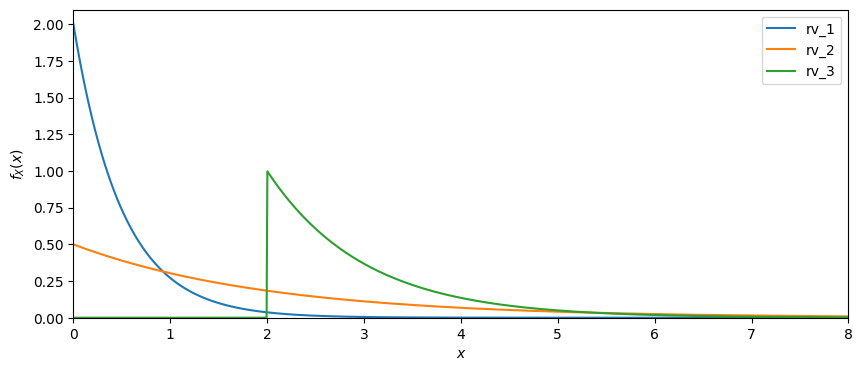

In [3]:
x_up = 8.

fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_pdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':x_up}) 

ax.set_ylim([0., None])
ax.set_xlim([0., x_up])
plt.xlabel(r"$x$")
plt.ylabel(r"$f_X(x)$")
plt.legend()
plt.show()

## CDF

The CDF $F_X(x)$ of the *log-normal* distribution is defined as:

$$F_X(x) = \Phi\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)$$

where $\Phi(\cdot)$ is the CDF of the {ref}`content:rv:stdn`.

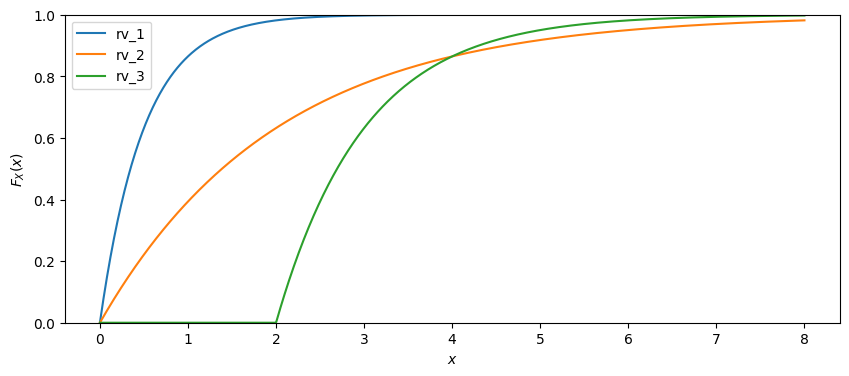

In [4]:
x_up = 8.

fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_cdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':x_up}) 
    
ax.set_ylim([0., 1.])
#ax.set_xlim([0., x_up])
plt.xlabel(r"$x$")
plt.ylabel(r"$F_X(x)$")
plt.legend()
plt.show()

## Quantile function

The *quantile function* of the *log-normal* distribution is: 

$$F_X^{-1}(p) = \exp\left( \lambda + \zeta \cdot\Phi^{-1}(p) \right) + \varepsilon \;, \quad p\in(0,1)$$

where $\Phi^{-1}(\cdot)$ is the quantile function of the {ref}`content:rv:stdn`.

## Standardizing Normal random variables

The *log-normal* random variable $X$ can be transformed to a {ref}`content:rv:stdn` $U$ through:

$$U = \frac{\ln(X-\varepsilon)-\lambda}{\zeta}$$

Conversely, a log-normal random variable $X$ with parameters $\lambda$ and $\zeta$ can be generated from a standard Normal variable as:

$$X = \exp\left(\lambda + \zeta \cdot U\right)+\varepsilon$$

## Parametrization in terms of $\mu_X$ and $\sigma_X$

If the mean and standard deviation are given, the parameters $\lambda$ and $\zeta$ can be derived as:

$$\lambda = \ln\left(\mu_X-\varepsilon\right)-\frac{1}{2}\ln\left(\frac{\sigma_X^2}{(\mu_X-\varepsilon)^2}+1\right)$$
$$\zeta = \sqrt{\ln\left(\frac{\sigma_X^2}{(\mu_X-\varepsilon)^2}+1\right)}$$
    
## Covariance of two correlated log-normal random variables

The correlation coefficient $\rho$ between two correlated log-normal random variables $X_1$ and $X_2$ is

$$\rho = \frac{\operatorname{COV}(X_1,X_2)}{\sigma_1\sigma_2} = \frac{\exp\left(\rho^\prime\sqrt{\ln(\delta_1^2+1)\ln(\delta_2^2+1)}\right)-1}{\delta_1\delta_2}$$

where $\delta_1$ and $\delta_2$ is the coefficient of variation of $X_1$ and $X_2$, respectively;
$\rho^\prime$ is the correlation coefficient of the underlying standard Normal random variables.